Load model from Google Drive

In [ ]:
from keras.models import load_model
from google.colab import drive
import os

drive.mount ('/content/drive')


# Path where you want to save the model in your Google Drive
folder_path = '/content/drive/My Drive/colab-models'
model_path = os.path.join(folder_path, 'custom_cnn_model_15epochs.keras')
loaded_model = load_model(model_path)

Mounted at /content/drive


1. Prepare images that you want to deploy the model on (handwritten digits, cats/dogs images)

2. Load images (use skimage library or PIL library)

In [ ]:
from PIL import Image
import numpy as np

# Open an image file
number = os.path.join(folder_path, 'numbers/','one1.png')
img = Image.open(number)

# images = []
# images.append(img1)
# images.append(img)

3. Extract one of the RGB channels (if the training set has only one channel)

In [ ]:
numpy_array = np.array(img)
print(numpy_array.shape)

(1236, 996, 4)


In [ ]:
## extract only one channel
## : means
img = np.array(numpy_array[:, :, 0])
# img = np.array(numpy_array[..., 0])
img.shape

(1236, 996)

In [ ]:
# a = np.arange(10)
# # a
# # a[3:6] # column can mean slicing
# a[:]

(1236, 996)


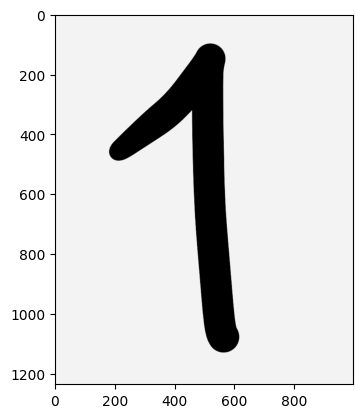

In [ ]:
# arr.shape
import matplotlib.pyplot as plt

plt.imshow(img, cmap='gray')
print(img.shape)


4. Resize images to the same as the training set (use skimage library or PIL library)

    e.g. (28 x 28) for the digit recognition model

In [ ]:
from skimage.transform import resize

img = resize(img, (28, 28))
img.shape

(28, 28)



5. Normalize images to the same as the training set

    e,g, [0, 1] for the digit recognition model

In [ ]:
img = (img - img.min()) / (img.max() - img.min())
img = img * -1 + 1

In [ ]:
img.shape

(28, 28)

(28, 28)


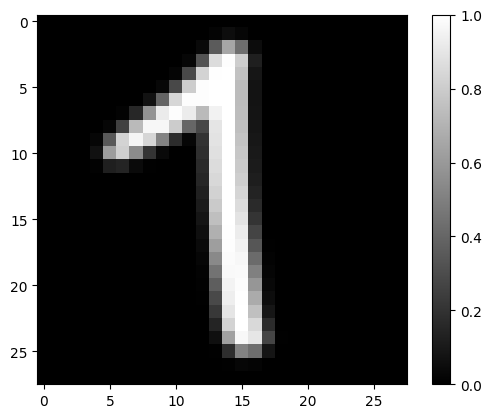

In [ ]:
plt.imshow(img, cmap='gray')
plt.colorbar()
print(img.shape)

6. Convert the image list into a numpy array and adjust it into the correct shape

In [ ]:
# img = np.atleast_3d(img)
# loaded_model.predict(img)
import tensorflow as tf

img = img[tf.newaxis, ..., tf.newaxis,]
img.shape

(1, 28, 28, 1)

In [ ]:
prediction = loaded_model.predict(img)

1/1 [==============================] - 0s 23ms/step


In [ ]:
import pandas as pd
pd.DataFrame(prediction)

,0,1,2,3,4,5,6,7,8,9
0,-5.578572,9.205422,0.481147,-3.200866,-1.970304,-4.169194,-5.048446,5.885336,-4.195432,-5.034552
